Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_recall_curve, average_precision_score

Loading Dataset

In [2]:
df = pd.read_csv("Student_Depression_Dataset.csv")

Analysis

In [3]:
df.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [6]:
df.shape

(27901, 18)

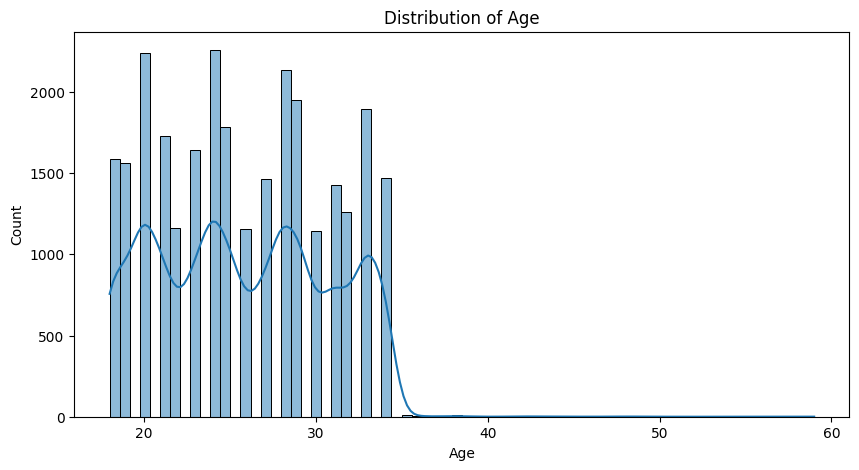

In [7]:
plt.figure(figsize=(10, 5))  
sns.histplot(df["Age"], kde=True)  
plt.title("Distribution of Age") 
plt.show()

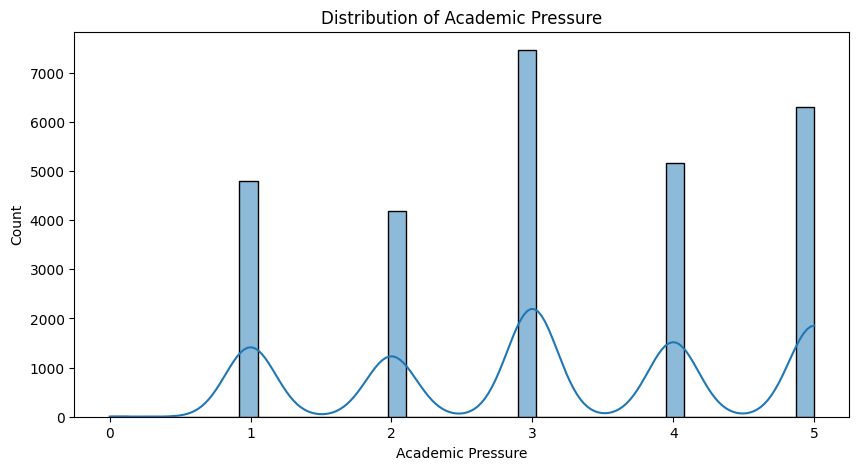

In [8]:
plt.figure(figsize=(10, 5))  
sns.histplot(df["Academic Pressure"], kde=True)  
plt.title("Distribution of Academic Pressure")  
plt.show()

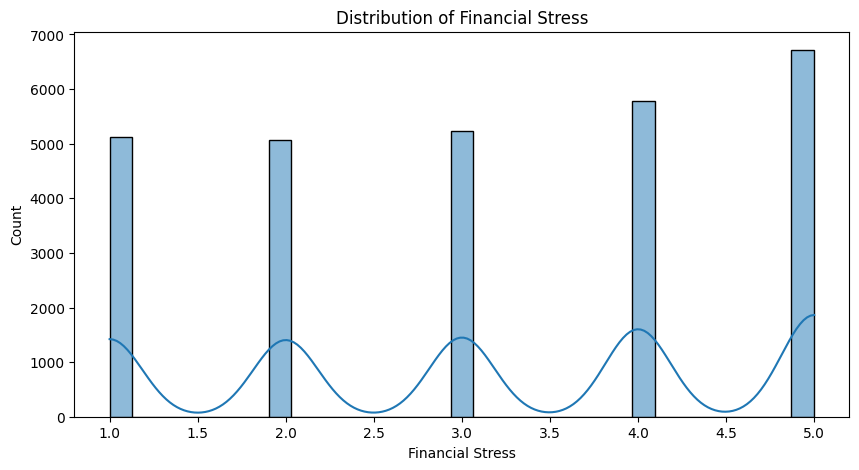

In [9]:
plt.figure(figsize=(10, 5))  
sns.histplot(df["Financial Stress"], kde=True)  
plt.title("Distribution of Financial Stress")  
plt.show()

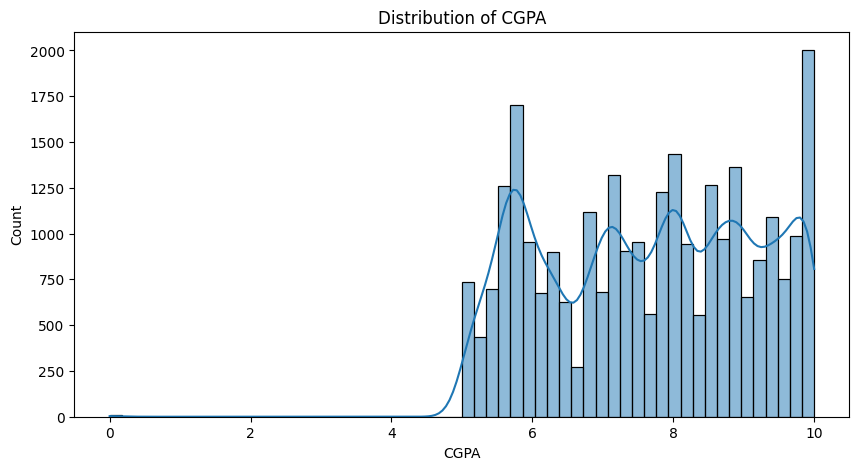

In [10]:
plt.figure(figsize=(10, 5))  
sns.histplot(df["CGPA"], kde=True)  
plt.title("Distribution of CGPA")
plt.show()

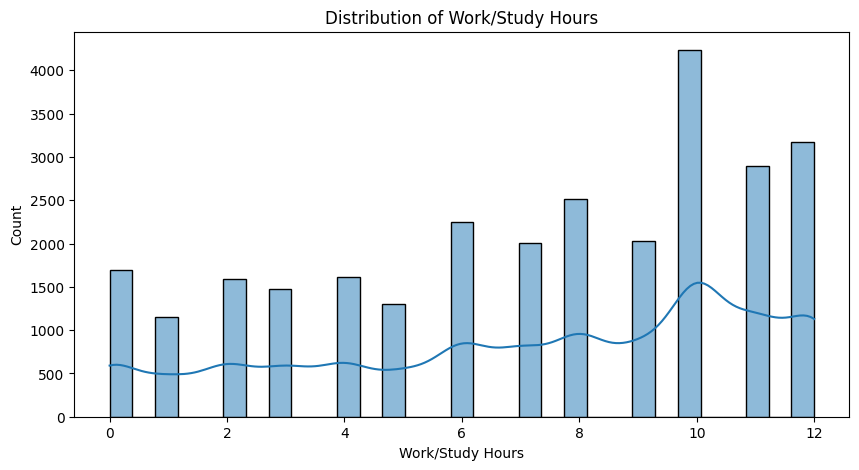

In [11]:
plt.figure(figsize=(10, 5)) 
sns.histplot(df["Work/Study Hours"], kde=True)  
plt.title("Distribution of Work/Study Hours")  
plt.show()

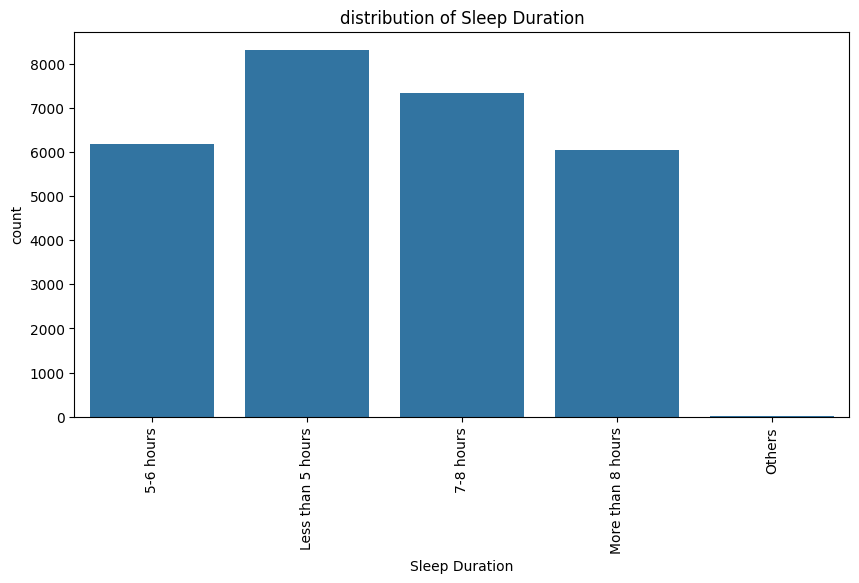

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Sleep Duration"])
plt.title(f"distribution of Sleep Duration")
plt.xticks(rotation=90)
plt.show()

Data preprocessing

In [13]:
# Drop unnecessary columns
df.drop(columns=["id", "City", "Profession", "Degree"], inplace=True)

In [14]:
print(f"missing values before treatment: {df.isna().sum().sum()}")

missing values before treatment: 3


In [15]:
# Fill missing numerical values
numerical_vars = df.select_dtypes(include=["int64", "float64"]).columns
for var in numerical_vars:
    df[var] = df[var].fillna(df[var].median())

In [16]:
# Fill missing categorical values with mode
categorical_vars = df.select_dtypes(include=["object"]).columns
for var in categorical_vars:
    df[var] = df[var].fillna(df[var].mode()[0])

In [17]:
print(f"missing values after treatment: {df.isna().sum().sum()}")

missing values after treatment: 0


Outliers

In [18]:
# Function to detect outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Column: {column} - Outliers detected: {len(outliers)}")

    return outliers

# Apply function to all numerical columns
for col in numerical_vars:
    detect_outliers_iqr(df, col)

Column: Age - Outliers detected: 12
Column: Academic Pressure - Outliers detected: 0
Column: Work Pressure - Outliers detected: 3
Column: CGPA - Outliers detected: 9
Column: Study Satisfaction - Outliers detected: 0
Column: Job Satisfaction - Outliers detected: 8
Column: Work/Study Hours - Outliers detected: 0
Column: Financial Stress - Outliers detected: 0
Column: Depression - Outliers detected: 0


In [19]:
# Handle missing values (fill with median for numerical column)
df["Financial Stress"].fillna(df["Financial Stress"].median(), inplace=True)

C:\Users\riyas\AppData\Local\Temp\ipykernel_19608\3862697172.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Financial Stress"].fillna(df["Financial Stress"].median(), inplace=True)


Encoding

In [20]:
# Encode binary column: "Have you ever had suicidal thoughts ?"
df["Have you ever had suicidal thoughts ?"] = df["Have you ever had suicidal thoughts ?"].map({"Yes": 1, "No": 0})

In [21]:
# Encode categorical columns using Label Encoding
categorical_cols = ["Gender", "Sleep Duration", "Dietary Habits", "Family History of Mental Illness"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future reference

In [22]:
# Define features (X) and target (y)
X = df.drop(columns=["Depression"])
y = df["Depression"]

In [23]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random forest classifier

In [25]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [27]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [28]:
# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 82.76%

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      2343
           1       0.84      0.86      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581


Confusion Matrix:
 [[1830  513]
 [ 449 2789]]


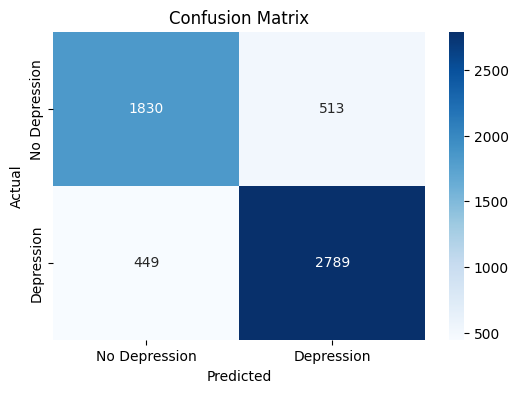

In [29]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [30]:
 # n_estimators increased from 100 to 200 to check accuracy
rf_model = RandomForestClassifier(
    n_estimators=200,      
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("[Random Forest Results]")
print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print("\nClassification Report:\n", report_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)

[Random Forest Results]
Accuracy: 83.32%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.80      2343
           1       0.84      0.88      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581


Confusion Matrix:
 [[1815  528]
 [ 403 2835]]


Logistic Regression



[Logistic Regression Results]
Accuracy: 83.68%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581


Confusion Matrix:
 [[1845  498]
 [ 413 2825]]


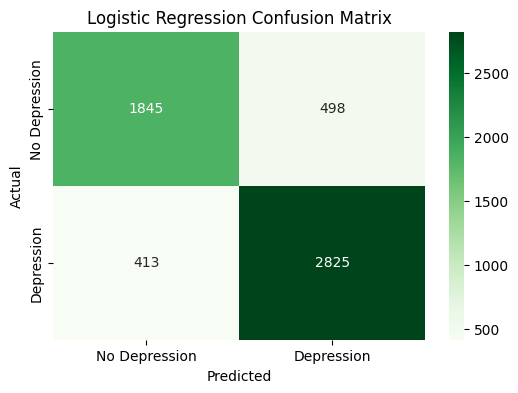

In [31]:
# Train a Logistic Regression Classifier
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate model performance
accuracy_log = accuracy_score(y_test, y_pred_log)
report_log = classification_report(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

# Display results
print(f"\n\n[Logistic Regression Results]")
print(f"Accuracy: {accuracy_log * 100:.2f}%")
print("\nClassification Report:\n", report_log)
print("\nConfusion Matrix:\n", conf_matrix_log)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Greens", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [32]:
# Feature importance analysis
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

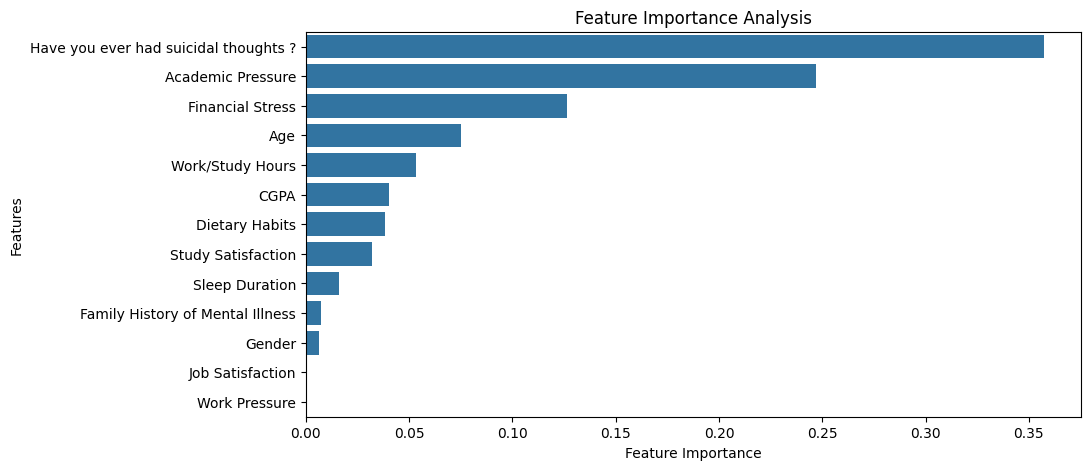

In [33]:
# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Analysis")
plt.show()

In [34]:
print("📝 Please provide the following details:")

def get_input(prompt, dtype=str):
    val = input(prompt)
    return dtype(val)

user_input = {
    'Gender': get_input("Gender (Male/Female): "),
    'Age': get_input("Age: ", int),
    'Academic Pressure': get_input("Academic Pressure (0-10): ", int),
    'Work Pressure': get_input("Work Pressure (0-10): ", int),
    'CGPA': get_input("CGPA (e.g. 7.5): ", float),
    'Study Satisfaction': get_input("Study Satisfaction (0-10): ", int),
    'Job Satisfaction': get_input("Job Satisfaction (0-10): ", int),
    'Sleep Duration': get_input("Sleep Duration (5-6 hours / 7-8 hours / Less than 5 hours / More than 8 hours): "),
    'Dietary Habits': get_input("Dietary Habits (Healthy / Moderate / Unhealthy): "),
    'Have you ever had suicidal thoughts ?': get_input("Have you ever had suicidal thoughts? (Yes/No): "),
    'Work/Study Hours': get_input("Work/Study Hours (per day): ", int),
    'Financial Stress': get_input("Financial Stress (0-10): ", int),
    'Family History of Mental Illness': get_input("Family History of Mental Illness? (Yes/No): ")
}

# Convert to DataFrame
user_df = pd.DataFrame([user_input])

# Encode categorical columns
for col in categorical_cols:
    if col in user_df:
        le = label_encoders[col]
        user_df[col] = le.transform(user_df[col])

# Encode suicidal thoughts
user_df["Have you ever had suicidal thoughts ?"] = 1 if user_input["Have you ever had suicidal thoughts ?"] == "Yes" else 0

# Ensure all required columns are present
for col in X_train.columns:
    if col not in user_df.columns:
        user_df[col] = 0

# Reorder columns
user_df = user_df[X_train.columns]

# Predict
user_prediction = rf_model.predict(user_df)[0]

# Output
result = "🟥 Depressed" if user_prediction == 1 else "🟩 Not Depressed"
print(f"\n✅ Prediction: {result}")

📝 Please provide the following details:


Gender (Male/Female):  Male
Age:  23
Academic Pressure (0-10):  8
Work Pressure (0-10):  0
CGPA (e.g. 7.5):  7.8
Study Satisfaction (0-10):  4
Job Satisfaction (0-10):  0
Sleep Duration (5-6 hours / 7-8 hours / Less than 5 hours / More than 8 hours):  5-6 hours
Dietary Habits (Healthy / Moderate / Unhealthy):  Moderate
Have you ever had suicidal thoughts? (Yes/No):  No
Work/Study Hours (per day):  8
Financial Stress (0-10):  2
Family History of Mental Illness? (Yes/No):  No



✅ Prediction: 🟩 Not Depressed


Heatmap

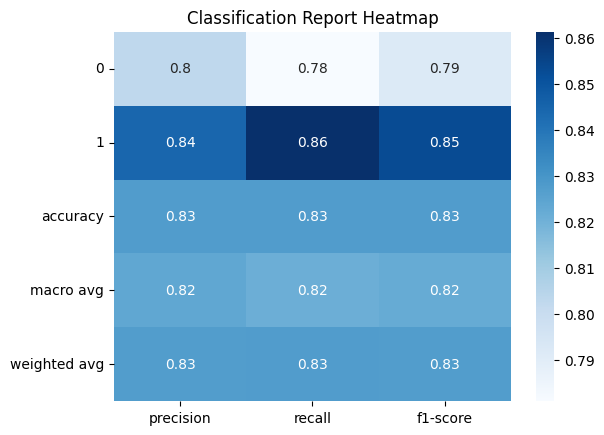

In [35]:
#Classification Report as Heatmap
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

Precision-Recall curve

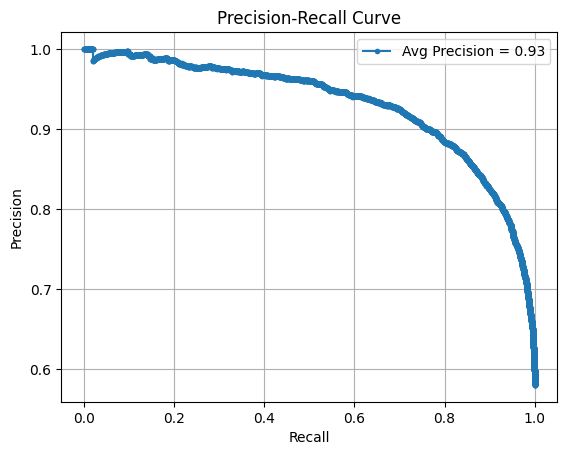

In [37]:
# Get predicted probabilities (for class 1)
y_proba = rf_model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure()
plt.plot(recall, precision, marker='.', label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()